# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [3]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [4]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [64]:
print (tweepy.__version__)

4.12.1


## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [39]:
# Collect tweets
#query = "Qatar" + "#MUFC" +  " -filter:retweets" 
#cutoff_date = "2023-03-02" 
searchTerms = "(Qatar AND #MUFC) OR #glazers OR #GlazersSellManUtd OR #QatarIn OR #GlazersOutNow" + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=searchTerms, lang="en", tweet_mode = 'extended' ).items(200)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)

In [40]:
df = pd.read_csv("current_set.csv")
df

,date,user,location,text
0,2023-03-06 13:32:02+00:00,shineparamel,India,@Gerry_Deakin @ManUtd Let's make a new trend f...
1,2023-03-06 13:31:12+00:00,mufcunitedmufc,NaN,good to see media or anyone taking #glazersout...
2,2023-03-06 13:23:47+00:00,aadace11_edits,NaN,Day 187 of tweeting anti glazers tags until th...
3,2023-03-06 13:23:22+00:00,Glazersmustsell,NaN,@MikeLUHG2 Please don't support him when we ar...
4,2023-03-06 13:20:33+00:00,saquibhkhan,"Mumbai, India",Thank u for showing dumb people the truth #Gla...
...,...,...,...,...
195,2023-03-05 20:57:12+00:00,mydenny3,NaN,we will bounce back_ #GlazersOut and #QatarIn...
196,2023-03-05 20:55:36+00:00,ChocoBe03692816,"Accra, Ghana",I really feel for Rashford because it turns ou...
197,2023-03-05 20:52:06+00:00,abdulmufc3,NaN,@UtdFaithfuls We will never be back unless we ...
198,2023-03-05 20:47:22+00:00,ShibadityaSaha3,NaN,@ManUtdMania_ Back the manager \nTrust the pro...


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [100]:
import nltk
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re


# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_text = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
tweets_text

tweets_list = []

# remove stop words
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words=stopwords.words('english')
my_stop_words.extend(sw_list)

for tweets in tweets_text['text']:
    # lowercase words
    tweets = tweets.lower()
    # remove punctuation
    no_punc_text=tweets.translate(str.maketrans('','',string.punctuation))
    #remove urls
    no_url_text=re.sub(r'http\S+', '', no_punc_text)
    # tokenisation
    tknzr = TweetTokenizer(strip_handles=True)
    tweets_tokens=tknzr.tokenize(no_url_text)
    no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
    tweets_tokens_joined=' '.join(no_stop_tokens)
    tweets_list.append(tweets_tokens_joined)
print(tweets_list)

['privilegemufc thats need qatarin asap happen eth worked wonders players called shit last season glazersoutnow', 'good morning reds ♥ ️ mufc glazersout qatarin', 'iqqumufc glazers emptied club coffers eth worked miracles knew needed several topquality reinforcements glazersoutnow', 'amysmalls right back manager back players back team believe glazersoutnow', 'glazerspissoff shaw immense season players big blip look worn fully expect ten hag drop next games never lose much though real message right though glazersout qatarin', 'result yesterday glazers head didnt back erik january transfer window knowing full well 4 competitions players would get burnt playing 2 games per week blame erik glazersoutnow', 'win lose draw continue fight glazers glazersout glazerssellmanutd', 'even suffer one 60 70 embarrassment ill still back erick ten haag still didnt get players wanted wanted cf back mid got bobo sabitzer please dont lose voice glazers glazersoutnow glazerssellmanutd', 'consistent glazerso

In [42]:
# # Load the regular expression library
# import re

# # Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
# tweets_df = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
# tweets_df

# # Remove punctuation
# tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub('[,\\.!?/\|[]', ' ', x))

# # Remove unnecessary line breaks
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# # Convert the titles to lowercase
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# # Remove hashtags, mentions, and usernames
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# # Remove links
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\s\S\s\S+\s\S+', '', x))

# # Remove vague letters
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
# tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# # Print out the first rows 
# print(tweets_df['text_processed'].head())

# # Removing duplicate tweets?
# unique_tweets = list(set(list(tweets_df['text_processed'].values)))
# unique_tweets = [t for t in unique_tweets if t]

# print(unique_tweets)

0     that's y we need   asapor more of that will h...
1                              good morning reds ♥️   
2     this the glazers have emptied the club coffer...
3     you did it right   we should do that back the...
4     shaw has been immense this season  most of ou...
Name: text_processed, dtype: object
[' sale the club you greedy bastards       ', 'wow……at least the  will def want to sell $manu now   🤯😆  ', " use aren't wanted accept the damn offer get out and don't show your faces in old trafford again  ", " let's do this  come on united  ", 'goldbridge why have you never tweeted            ', '   out and qatar in ', 'i was much more nervous about that final last week  honestly thought this was in the bag  a draw at the very worst   lol  always look on the bright side of life…  ✊  ', "fascinating piece this -  travelled to doha to discover who is pulling the strings in a £6bn plan to buy manchester united  turns out it's the man who 'bought london' must read for  fans", "tbf th

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

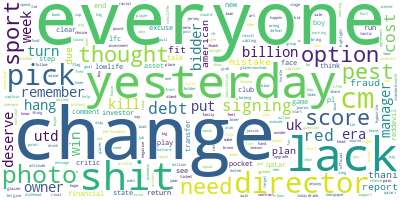

In [103]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(tweets_list)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

In [105]:
# get the frequency of each word in the text
word_freq = wordcloud.process_text(new_long_string)

# print the top 10 words with their frequency
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {freq}")

change: 2
everyone: 2
yesterday: 2
lack: 2
shit: 2
director: 2
pick: 2
cm: 2
photo: 2
option: 2
pest: 2
sport: 2
thought: 2
score: 2
need: 2
signing: 2
cost: 2
debt: 2
red: 2
remember: 2


# Topic Modelling

In [96]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egatzinski\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'DataFrame' object has no attribute 'text_processed'

In [8]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"co" + 0.040*"https" + 0.029*"awards" + 0.022*"brit" + 0.016*"fav" + '
  '0.016*"looks" + 0.011*"britawards" + 0.010*"insists" + 0.009*"grennan" + '
  '0.008*"post"'),
 (1,
  '0.031*"https" + 0.026*"co" + 0.018*"awards" + 0.017*"brit" + '
  '0.016*"psychic" + 0.015*"ago" + 0.014*"britawards" + 0.011*"tom" + '
  '0.010*"grennan" + 0.010*"magazine"'),
 (2,
  '0.056*"co" + 0.047*"https" + 0.032*"britawards" + 0.016*"year" + '
  '0.016*"women" + 0.014*"carpet" + 0.014*"nqmvaxz" + 0.013*"red" + '
  '0.013*"looks" + 0.013*"best"'),
 (3,
  '0.075*"co" + 0.074*"https" + 0.017*"britawards" + 0.010*"opensea" + '
  '0.010*"check" + 0.010*"influencers" + 0.010*"huge" + 0.010*"adele" + '
  '0.008*"got" + 0.008*"brit"'),
 (4,
  '0.043*"https" + 0.041*"co" + 0.018*"music" + 0.018*"day" + 0.014*"brit" + '
  '0.014*"best" + 0.014*"red" + 0.013*"carpet" + 0.010*"awards" + '
  '0.010*"police"')]


In [9]:
# visualise the topics
!pip install pyldavis

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [10]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\egatzinski\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.113014  0.006415       1        1  31.593038
0      0.040139 -0.080667       2        1  21.308152
2      0.040394  0.050674       3        1  19.228498
1      0.000555 -0.037078       4        1  14.095428
4      0.031927  0.060655       5        1  13.774884, topic_info=           Term      Freq     Total Category  logprob  loglift
260         day  1.000000  1.000000  Default  30.0000  30.0000
103        best  2.000000  2.000000  Default  29.0000  29.0000
108         red  2.000000  2.000000  Default  28.0000  28.0000
104      carpet  2.000000  2.000000  Default  27.0000  27.0000
2    britawards  6.000000  6.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
52       awards  0.572748  6.064843   Topic5  -4.6294  -0.3775
70       styles  0.571554  1.665735   Topic5  -4.6315   0.9127
132   statement  0.571507  1.710108   Topic5  -4.6316   0.8863
50     stunning  0.571503  1.694435   Topic5  -4.6316   0.8955
64        harry  0.571446  1.664014   Topic5  -4.6317   0.9135

[238 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
205       1  0.821435    aandm
266       5  0.935506      add
146       1  0.546382    adele
74        4  0.571008      ago
193       4  0.869068    album
...     ...       ...      ...
285       2  0.811002    yjbqa
192       1  0.821436       yl
204       4  0.868419      yrs
168       4  0.848848       zm
275       5  0.935492  znwllqw

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [11]:
!pip install vaderSentiment

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

poster from #smashhits magazine  30 yrs ago #onthisdayinpop in 1993 - #envogue were flying high in the album charts… https://t co/2tc98qgukj	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
happy 26th birthday to the iconic 1997 brit awards performance by the @spicegirls   definitely in my top 10 favorit… https://t co/xz7e9yjbqa	{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.8807}
#harrystyles rebounds 7-6 on the #officialukchart with his chart-topping #asitwas  after his huge win at the… https://t co/7fepyclez5	{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7269}
there are no #women headlining at #glastonbury this year  apparently aren't enough #female performers to choose fro… https://t co/r8ka8pmxqz	{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.296}
here's the best red carpet looks of brit awards 2023 https://t co/vc2nqmvaxz #reel #reels #short #shortvideo… https://t co/pwrsv4ojfa	{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.802}
fav brit award

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: wasabi
    Found existing installation: wasabi 0.8.2
    Uninstalling wasabi-0.8.2:
      Successfully uninstalled wasabi-0.8.2
  Attempting uninstall: blis
    Found existing installation: blis 0.7.5
    Uninstalling blis-0.7.5:
      Successfully uninstalled blis-0.7.5
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.12
    Uninstalling thinc-8.0.12:
      Successfully uninstalled thinc-8.0.12
  Attempting uninstall: spacy-legacy
    Found existing installation: spacy-legacy 3.0.8
    Uninstalling spacy-legacy-3.0.8:
      Successfully uninstalled spacy-legacy-3.0.8
  Attempting uninstall: pathy
    Found existing installation: pathy 0.6.1
    Uninstalling pathy-0.6.1:
      Successfully uninstalled pathy-0.6.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.0
    Un

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.5.0 which is incompatible.


In [ ]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [ ]:
!pip install spacy-entity-linker
!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

In [ ]:
from spacy_entity_linker import EntityLinker
!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

In [ ]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass
